<a href="https://colab.research.google.com/github/Mahalete/Arcada/blob/master/Deep_Learning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries 


In [65]:
import numpy as np               # library for numerical arrays (vectors, matrices, tensors)
import matplotlib.pyplot as plt  # library providing tools for plotting data 
import tensorflow                # tensorflow library providing methods for defining and training ANN 

### Step 1 - Loading Data
MNIST digits classification dataset
The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.



In [66]:
# load dataset
from tensorflow.keras.datasets import mnist
(trainval_images, trainval_labels), (test_images, test_labels_numeric) = mnist.load_data()

# shape of train and test image
print(f'Number of training and validation examples{trainval_images.shape}')
print(f'Number of test examples{test_images.shape}')

Number of training and validation examples(60000, 28, 28)
Number of test examples(10000, 28, 28)


In [67]:
# the label values are stored as integer numbers, in the range [0, 9]
# these numeric labels correspond to the classes of items the image represent:

labels = np.unique(test_labels_numeric)
print(labels)

[0 1 2 3 4 5 6 7 8 9]


In [68]:
class_names = ['Digit:0 ', 'Digit:1 ', 'Digit:2 ', 'Digit:3 ', 'Digit:4 ',
               'Digit:5 ',      'Digit:6 ',   'Digit:7',  'Digit:8 ', 'Digit:9'  ]

# display numeric label and corresponding class name 
print('label value \t\t category')
for class_name, label in zip(class_names, labels):
    print (f'{label} \t\t {class_name}')

label value 		 category
0 		 Digit:0 
1 		 Digit:1 
2 		 Digit:2 
3 		 Digit:3 
4 		 Digit:4 
5 		 Digit:5 
6 		 Digit:6 
7 		 Digit:7
8 		 Digit:8 
9 		 Digit:9


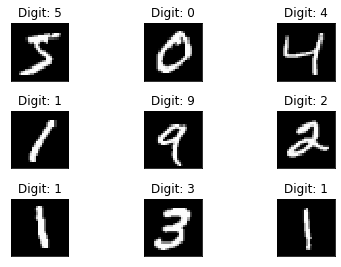

In [69]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(trainval_images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(trainval_labels[i]))
  plt.xticks([])
  plt.yticks([])


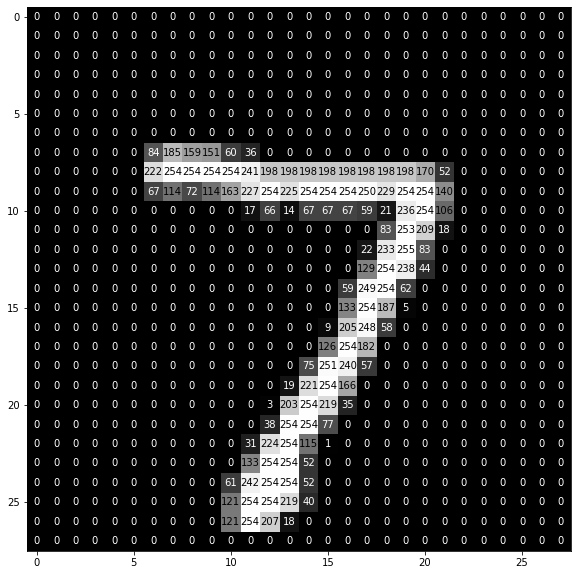

In [70]:
# select the image to visualize
img = test_images[0]
# create figure and axis objects
fig, ax = plt.subplots(1,1,figsize = (10,10)) 
# display image
ax.imshow(img, cmap='gray')
width, height = img.shape
# this value will be needed in order to change the color of annotations
thresh = img.max()/2.5

# display grayscale value of each pixel
for x in range(width):
    for y in range(height):
        val = (img[x][y])
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    # if a pixel is black set the color of annotation as white
                    color='white' if img[x][y]<thresh else 'black')

In [71]:
trainval_labels = tensorflow.keras.utils.to_categorical(trainval_labels)   # convert the data type for label values in training set
test_labels     = tensorflow.keras.utils.to_categorical(test_labels_numeric)   # convert the data type for label values in test set 

print("label in numeric form of first data point in test set: ",test_labels_numeric[0])
print("label in one-hot form of first data point in test set: ",test_labels[0])

label in numeric form of first data point in test set:  7
label in one-hot form of first data point in test set:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Step 2. Define Hypothesis Space - ANN Structure

In particular, we use an ANN with the following layers:

one input layer followed by
one dense layer with ReLU activation functions, follows by
one dense output layer using softmax activation function.

In [72]:
# define model architecture

model = tensorflow.keras.Sequential()       # create an object "model" that represents an ANN

# define an input layer with 784 nodes (features) and add a hidden layer with 128 neurons
# the input layer is densely connected with the hidden layer, i.e., there is are links between 
# every pair of input node and neuron in the first hidden layer 

model.add(tensorflow.keras.layers.Dense(128, activation='relu', input_shape=(784,)))  

# add ouput layer consisting of 10 neurons using softmax activation function 
# the preceeding layer is densely connected to the ouput layer

model.add(tensorflow.keras.layers.Dense(10, activation='softmax')) 

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


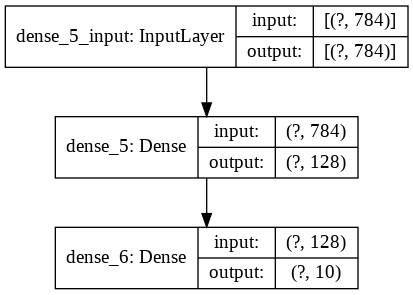

In [73]:
tensorflow.keras.utils.plot_model(
    model,
    to_file='model.png',show_shapes=True, show_layer_names=True)

### Step 3 - Choose Loss Function and Optimizer (SGD Variant)

In [74]:
# compile the model
model.compile(optimizer=tensorflow.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
# reshape the training and test images
trainval_images = trainval_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Normalize data to have feature values between 0 and 1
trainval_images = trainval_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [76]:
#time 
# track execution time

History = model.fit(trainval_images, trainval_labels, validation_split=0.2, batch_size=28, epochs=20)

Epoch 1/20
1715/1715 [==============================] - 5s 3ms/step - loss: 0.2747 - accuracy: 0.9212 - val_loss: 0.1648 - val_accuracy: 0.9523
Epoch 2/20
1715/1715 [==============================] - 5s 3ms/step - loss: 0.1329 - accuracy: 0.9612 - val_loss: 0.1233 - val_accuracy: 0.9658
Epoch 3/20
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0988 - accuracy: 0.9721 - val_loss: 0.1242 - val_accuracy: 0.9654
Epoch 4/20
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0799 - accuracy: 0.9770 - val_loss: 0.1121 - val_accuracy: 0.9712
Epoch 5/20
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0671 - accuracy: 0.9813 - val_loss: 0.1201 - val_accuracy: 0.9695
Epoch 6/20
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0561 - accuracy: 0.9843 - val_loss: 0.1096 - val_accuracy: 0.9739
Epoch 7/20
1715/1715 [==============================] - 5s 3ms/step - loss: 0.0493 - accuracy: 0.9862 - val_loss: 0.1136 - val_accuracy:

In [77]:
# accuracy values are stored in the dictionary `History.history` 
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current tensorflow version
if int(tensorflow.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

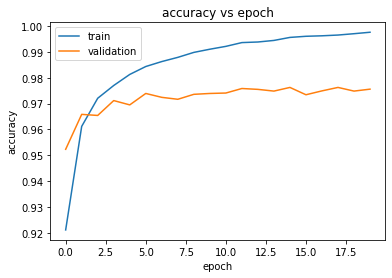

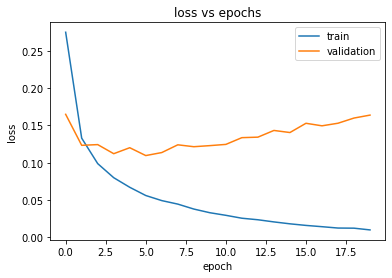

In [78]:
###-----plot accuracy-----------
# plot training accuracy
plt.plot(History.history[acc_key])
# plot validation accuracy
plt.plot(History.history['val_' + acc_key])
# set title
plt.title('accuracy vs epoch')
# set x and y axis labels
plt.ylabel('accuracy')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper left')
# display the plot
plt.show()

###-----plot loss---------------
# plot training loss
plt.plot(History.history['loss'])
# plot validation loss
plt.plot(History.history['val_loss'])
# set title
plt.title('loss vs epochs')
# set x and y axis labels
plt.ylabel('loss')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper right')
# display the plot
plt.show()

In [79]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.1357 - accuracy: 0.9769


In [80]:
print('Accuracy on test dataset:', test_accuracy)

Accuracy on test dataset: 0.9768999814987183
